Running benchmarks...
Benchmarking size 100 (1/18)
Benchmarking size 200 (2/18)
Benchmarking size 300 (3/18)
Benchmarking size 400 (4/18)
Benchmarking size 500 (5/18)
Benchmarking size 600 (6/18)
Benchmarking size 700 (7/18)
Benchmarking size 800 (8/18)
Benchmarking size 900 (9/18)
Benchmarking size 1000 (10/18)
Benchmarking size 1500 (11/18)
Benchmarking size 2000 (12/18)
Benchmarking size 2500 (13/18)
Benchmarking size 3000 (14/18)
Benchmarking size 3500 (15/18)
Benchmarking size 4000 (16/18)
Benchmarking size 4500 (17/18)
Benchmarking size 5000 (18/18)


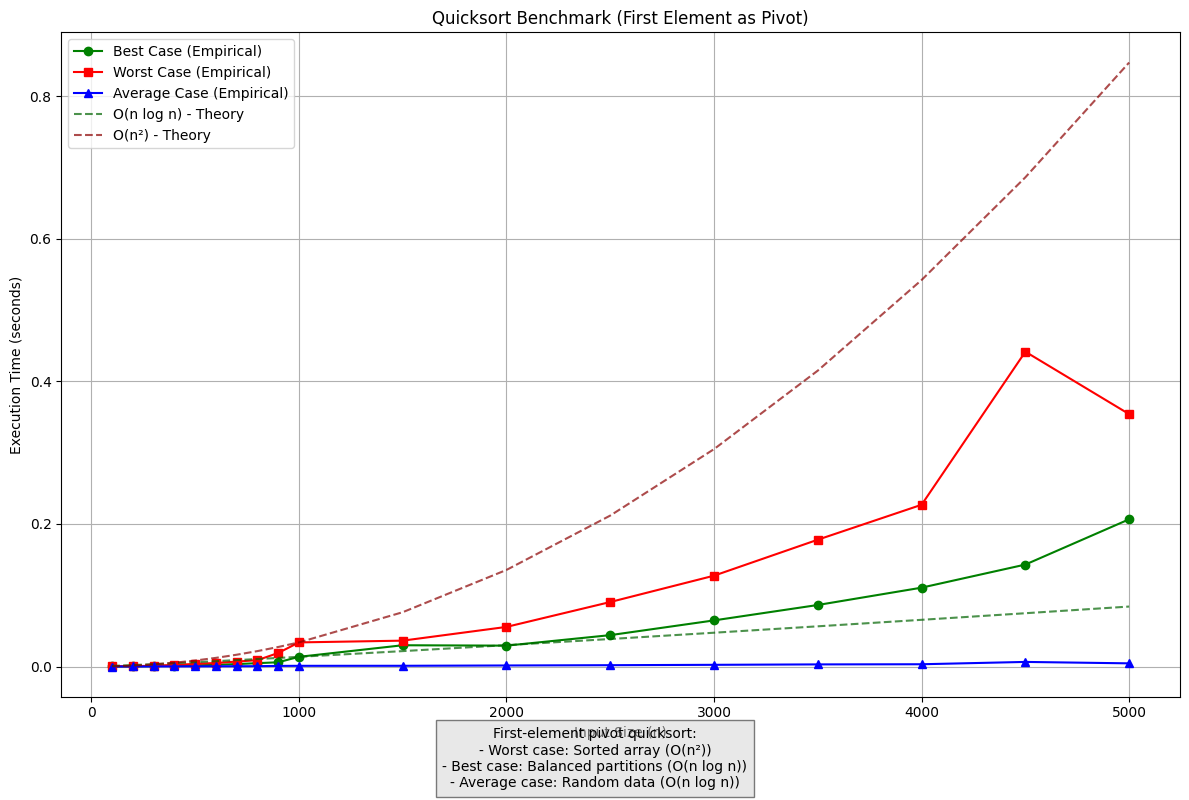


Benchmark Summary:
Largest input size: 5000
Best case time: 0.206592 seconds
Worst case time: 0.354073 seconds
Average case time: 0.004520 seconds
Ratio (worst/best): 1.71x


In [4]:
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Iterative Quicksort with first element as pivot
def quicksort_iterative(arr):
    stack = deque()
    stack.append((0, len(arr) - 1))  # Push the initial range onto the stack

    while stack:
        low, high = stack.pop()  # Pop the next range to process
        if low < high:
            pivot_index = partition(arr, low, high)
            # Push the left and right subarrays onto the stack
            stack.append((low, pivot_index - 1))
            stack.append((pivot_index + 1, high))

def partition(arr, low, high):
    pivot = arr[low]  # Choose the first element as the pivot
    i = low + 1
    j = high
    while True:
        while i <= j and arr[i] <= pivot:
            i += 1
        while i <= j and arr[j] >= pivot:
            j -= 1
        if i <= j:
            arr[i], arr[j] = arr[j], arr[i]
        else:
            break
    arr[low], arr[j] = arr[j], arr[low]  # Move pivot to its final position
    return j

# Generate worst-case input for first-element pivot (sorted array)
def generate_worst_case(n):
    return list(range(n))

# Generate best-case input for first-element pivot
def generate_best_case(n):
    arr = list(range(n))
    # Swap median to first position to ensure balanced partitioning
    median_idx = n // 2
    arr[0], arr[median_idx] = arr[median_idx], arr[0]
    return arr

# Generate average-case input (random uniform distribution)
def generate_average_case(n):
    return [random.randint(0, 1000) for _ in range(n)]

# Benchmarking function with multiple runs for stability
def benchmark_quicksort(n, case, runs=3):
    times = []
    for _ in range(runs):
        if case == "best":
            arr = generate_best_case(n)
        elif case == "worst":
            arr = generate_worst_case(n)
        elif case == "average":
            arr = generate_average_case(n)
        else:
            raise ValueError("Invalid case. Use 'best', 'worst', or 'average'.")

        # Create a copy to avoid modifying the original array
        arr_copy = arr.copy()

        # Measure execution time
        start_time = timeit.default_timer()
        quicksort_iterative(arr_copy)
        end_time = timeit.default_timer()

        times.append(end_time - start_time)

    # Return the average time
    return sum(times) / runs

# Benchmark for different input sizes and cases
def run_benchmarks():
    # Use smaller steps for larger arrays to reduce total runtime
    small_sizes = list(range(100, 1001, 100))  # 100 to 1000 in steps of 100
    large_sizes = list(range(1000, 5001, 500))  # 1000 to 5000 in steps of 500
    input_sizes = small_sizes + large_sizes[1:]  # Combine, avoiding duplicate 1000

    best_case_times = []
    worst_case_times = []
    average_case_times = []

    print("Running benchmarks...")
    for i, n in enumerate(input_sizes):
        print(f"Benchmarking size {n} ({i+1}/{len(input_sizes)})")
        best_case_times.append(benchmark_quicksort(n, "best"))
        worst_case_times.append(benchmark_quicksort(n, "worst"))
        average_case_times.append(benchmark_quicksort(n, "average"))

    return input_sizes, best_case_times, worst_case_times, average_case_times

# Plot the results with theoretical curves
def plot_benchmarks(input_sizes, best_case_times, worst_case_times, average_case_times):
    plt.figure(figsize=(12, 8))

    # Plot empirical results
    plt.plot(input_sizes, best_case_times, 'o-', label="Best Case (Empirical)", color='green')
    plt.plot(input_sizes, worst_case_times, 's-', label="Worst Case (Empirical)", color='red')
    plt.plot(input_sizes, average_case_times, '^-', label="Average Case (Empirical)", color='blue')

    # Add theoretical curves (scaled to match empirical data)
    # Get scaling factors from the empirical data
    n_mid = input_sizes[len(input_sizes)//2]
    best_mid = best_case_times[len(input_sizes)//2]
    worst_mid = worst_case_times[len(input_sizes)//2]

    # Generate theoretical curves
    x = np.array(input_sizes)
    best_scale = best_mid / (n_mid * np.log2(n_mid))
    worst_scale = worst_mid / (n_mid ** 2)

    best_theory = best_scale * x * np.log2(x)
    worst_theory = worst_scale * x ** 2

    plt.plot(x, best_theory, '--', label="O(n log n) - Theory", color='darkgreen', alpha=0.7)
    plt.plot(x, worst_theory, '--', label="O(n²) - Theory", color='darkred', alpha=0.7)

    plt.xlabel("Input Size (n)")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Quicksort Benchmark (First Element as Pivot)")
    plt.legend()
    plt.grid(True)

    # Add an explanation text box
    explanation = (
        "First-element pivot quicksort:\n"
        "- Worst case: Sorted array (O(n²))\n"
        "- Best case: Balanced partitions (O(n log n))\n"
        "- Average case: Random data (O(n log n))"
    )
    plt.figtext(0.5, 0.01, explanation, ha="center", fontsize=10,
                bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})

    plt.tight_layout(rect=[0, 0.05, 1, 1])  # Adjust layout to make room for text
    plt.savefig('quicksort_benchmark.png', dpi=300)
    plt.show()

# Run the benchmarks and plot the results
if __name__ == "__main__":
    input_sizes, best_case_times, worst_case_times, average_case_times = run_benchmarks()
    plot_benchmarks(input_sizes, best_case_times, worst_case_times, average_case_times)

    # Print summary statistics
    print("\nBenchmark Summary:")
    print(f"Largest input size: {input_sizes[-1]}")
    print(f"Best case time: {best_case_times[-1]:.6f} seconds")
    print(f"Worst case time: {worst_case_times[-1]:.6f} seconds")
    print(f"Average case time: {average_case_times[-1]:.6f} seconds")
    print(f"Ratio (worst/best): {worst_case_times[-1]/best_case_times[-1]:.2f}x")